In [2]:
# a. Import the necessary packages 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers


In [3]:
# b. Load the training and testing data (MNIST) 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 


In [4]:
# Normalize data (0–255 → 0–1) 
x_train = x_train.astype("float32") / 255.0 
x_test = x_test.astype("float32") / 255.0 


In [5]:
# Flatten 28x28 images → 784 vector 
x_train = x_train.reshape(-1, 784) 
x_test = x_test.reshape(-1, 784) 


In [6]:
# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10) 


In [7]:
print("Training data shape:", x_train.shape, y_train.shape) 
print("Testing data shape:", x_test.shape, y_test.shape) 


Training data shape: (60000, 784) (60000, 10)
Testing data shape: (10000, 784) (10000, 10)


In [14]:
# c. Define the network architecture using Keras 
model = keras.Sequential([ 
    layers.Dense(256, activation='relu', input_shape=(784,)), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax') # 10 classes for MNIST 
]) 


D:\software\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# d. Compile model with SGD optimizer 
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),  loss="categorical_crossentropy", 
    metrics=["accuracy"]) 


In [18]:
# e. Train the model 
history = model.fit(x_train, y_train, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.2, 
    verbose=1) 

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8419 - loss: 0.5413 - val_accuracy: 0.9336 - val_loss: 0.2365
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - loss: 0.2020 - val_accuracy: 0.9532 - val_loss: 0.1626
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9581 - loss: 0.1419 - val_accuracy: 0.9608 - val_loss: 0.1328
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.1096 - val_accuracy: 0.9604 - val_loss: 0.1325
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0888 - val_accuracy: 0.9687 - val_loss: 0.1090
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0718 - val_accuracy: 0.9722 - val_loss: 0.1020
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0593 - val_accuracy: 0.9686 - val_loss: 0.1001
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0505 - val_accuracy: 0.

In [20]:
# Evaluate on test data 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) 
print("Test Accuracy:", test_acc) 
print("Test Loss:", test_loss) 


Test Accuracy: 0.9761000275611877
Test Loss: 0.07630062848329544


In [22]:
# f. Plot training loss and accuracy 
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

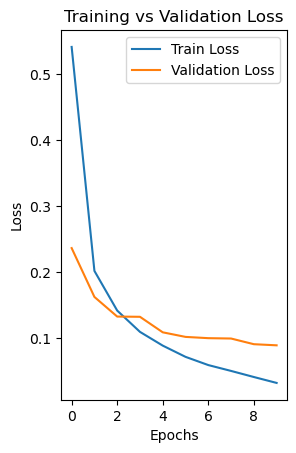

In [24]:
# Plot Loss 
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss") 
plt.plot(history.history["val_loss"], label="Validation Loss") 
plt.title("Training vs Validation Loss") 
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 


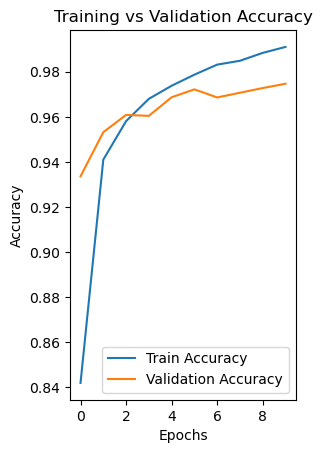

In [26]:
# Plot Accuracy 
plt.subplot(1, 2, 2) 
plt.plot(history.history["accuracy"], label="Train Accuracy") 
plt.plot(history.history["val_accuracy"], label="Validation Accuracy") 
plt.title("Training vs Validation Accuracy") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
plt.show() 
